In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Business Problem

In [2]:
cola =pd.read_excel("CocaCola_Sales_Rawdata.xlsx")

In [3]:
cola.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [4]:
cola.shape

(42, 2)

In [5]:
cola.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [6]:
cola[cola.duplicated()]

,Quarter,Sales


In [7]:
cola.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [8]:
for i in cola.columns:
    print(i)

Quarter
Sales


In [9]:
cola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 804.0+ bytes


In [10]:
#We will extract Quarter values and Year values separately from 'Quarter column'
cola['Quarters']=0
cola['Year']=0
for i in range(42):
    p=cola["Quarter"][i]
    cola['Quarters'][i]=p[0:2]
    cola['Year'][i]=p[3:5]

In [11]:
cola.head()

,Quarter,Sales,Quarters,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87


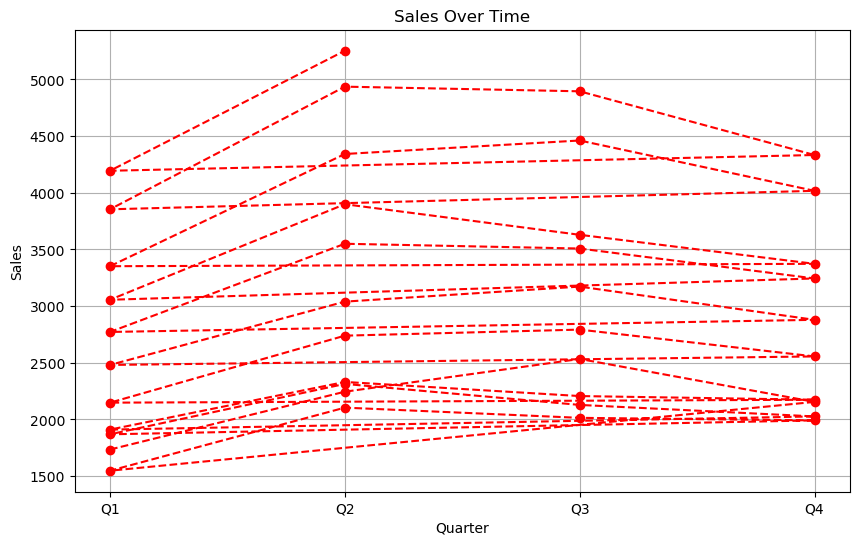

In [12]:
# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(cola.Quarters, cola['Sales'],color='r',linestyle='--',marker='o')
plt.title('Sales Over Time')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

<Axes: xlabel='Year', ylabel='Sales'>

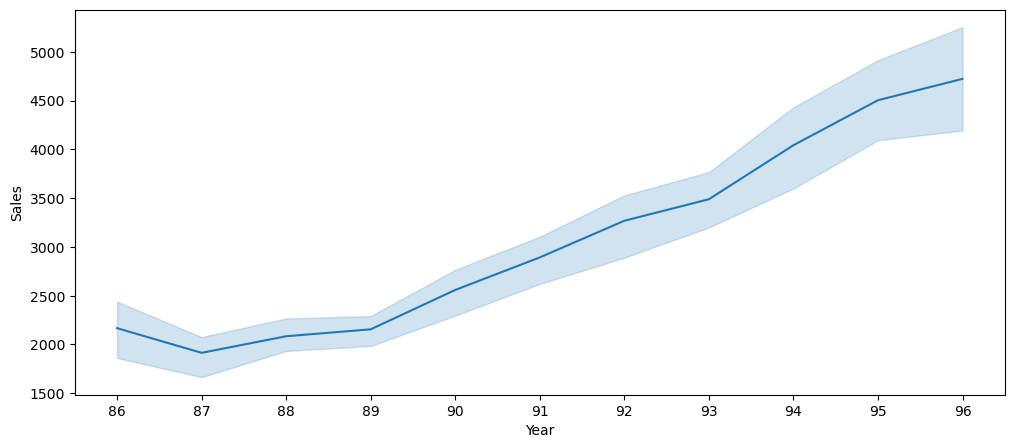

In [13]:
plt.figure(figsize=(12,5))
sns.lineplot(x='Year',y='Sales',data=cola)

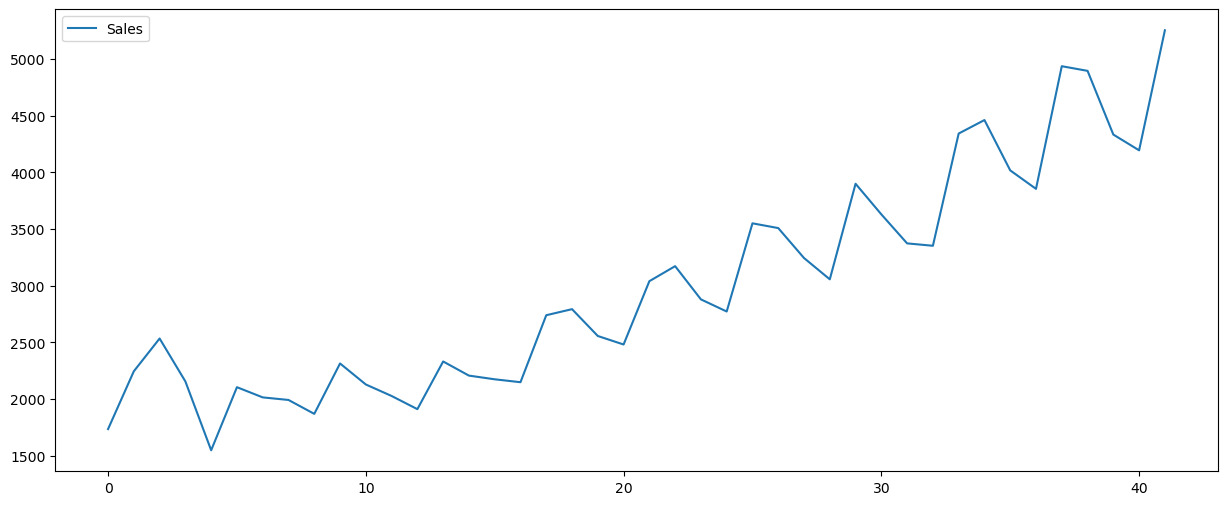

In [14]:
cola.plot(figsize=(15, 6))
plt.show()

In [15]:
cola.drop(['Quarter'],inplace=True,axis=1)

In [16]:
cola.head()

,Sales,Quarters,Year
0,1734.827000,Q1,86
1,2244.960999,Q2,86
2,2533.804993,Q3,86
3,2154.962997,Q4,86
4,1547.818996,Q1,87


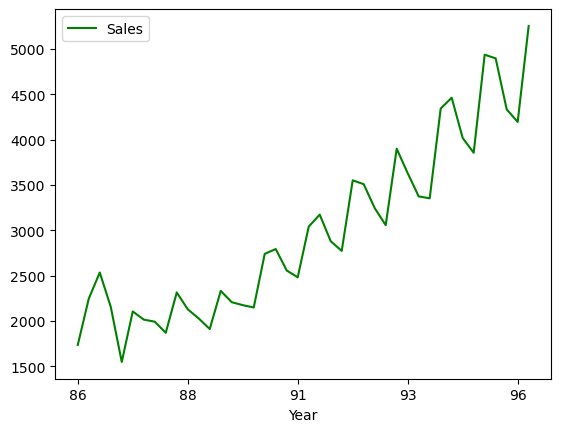

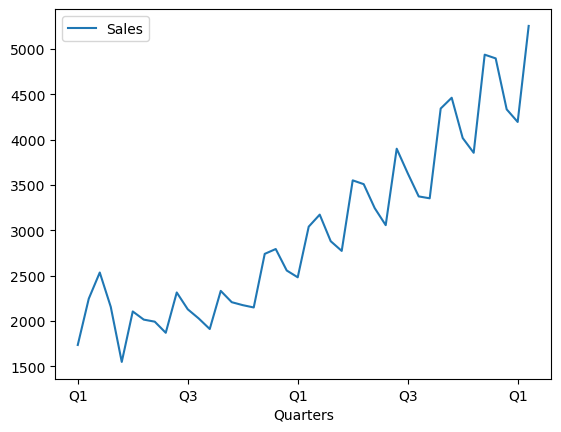

In [17]:
cola.plot(x='Year',y='Sales',color='g');

cola.plot(x='Quarters',y='Sales');

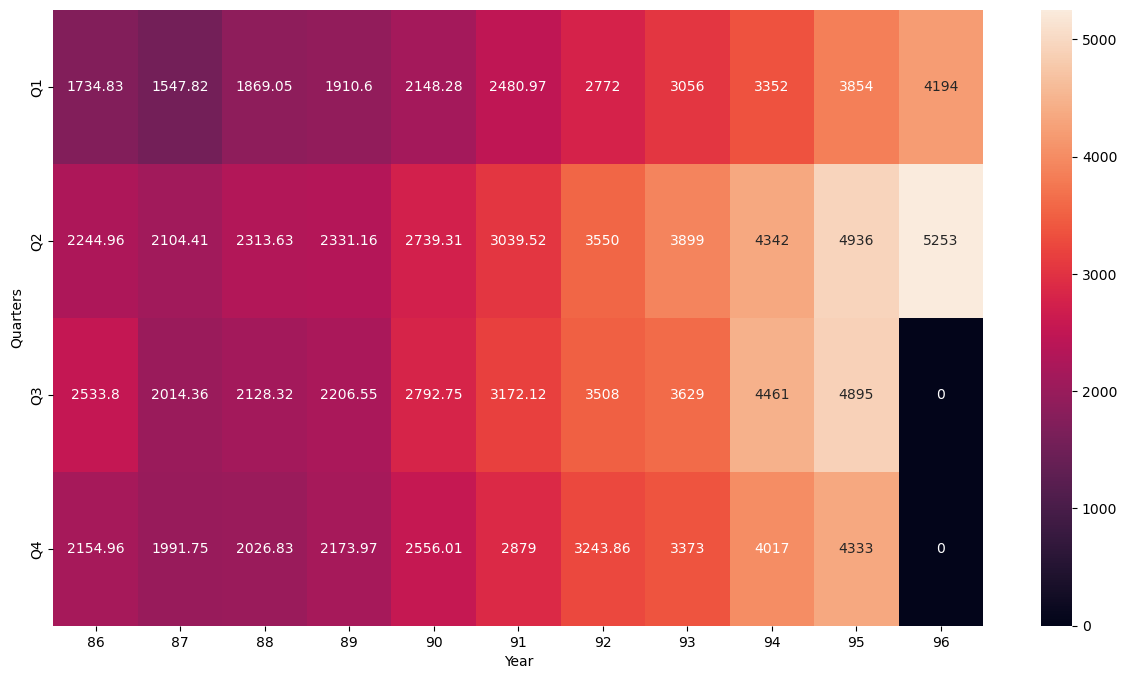

In [18]:
plt.figure(figsize=(15,8))
heatmap_cola = pd.pivot_table(cola,values='Sales',index="Quarters",columns='Year',fill_value=0)
sns.heatmap(heatmap_cola,annot=True,fmt='g');

In [19]:
#Getting dummy variables for Q1,Q2,Q3,Q4
quarters_dummies = pd.DataFrame(pd.get_dummies(cola['Quarters'],dtype='float'))
cola = pd.concat([cola,quarters_dummies],axis=1)
cola.head()

,Sales,Quarters,Year,Q1,Q2,Q3,Q4
0,1734.827000,Q1,86,1.0,0.0,0.0,0.0
1,2244.960999,Q2,86,0.0,1.0,0.0,0.0
2,2533.804993,Q3,86,0.0,0.0,1.0,0.0
3,2154.962997,Q4,86,0.0,0.0,0.0,1.0
4,1547.818996,Q1,87,1.0,0.0,0.0,0.0


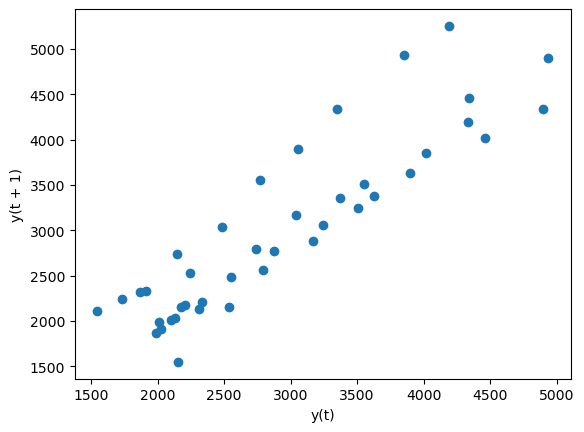

In [20]:
# create a scatter plot
from pandas.plotting import lag_plot
lag_plot(cola.Sales)
plt.show()

In [21]:
import statsmodels.graphics.tsaplots as tsa_plots

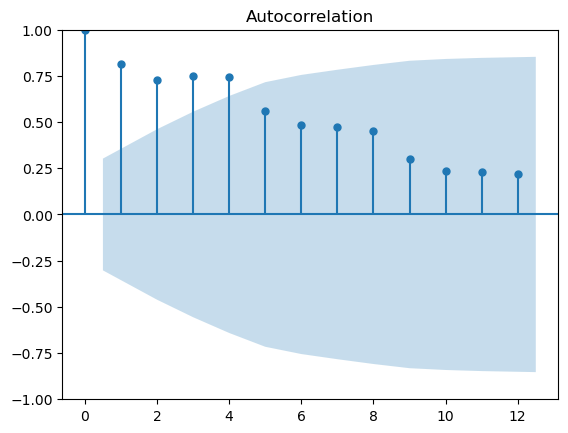

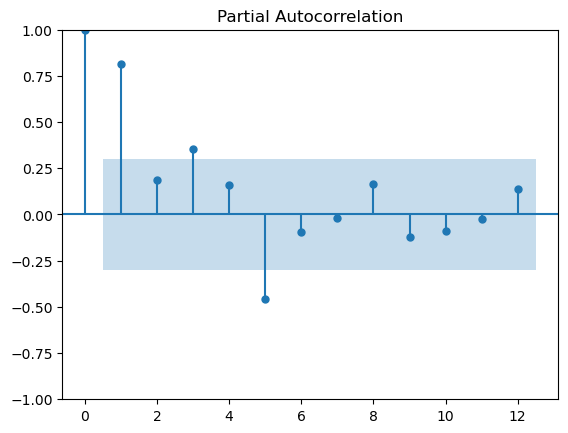

In [22]:
tsa_plots.plot_acf(cola.Sales,lags=12)
tsa_plots.plot_pacf(cola.Sales,lags=12)
plt.show()

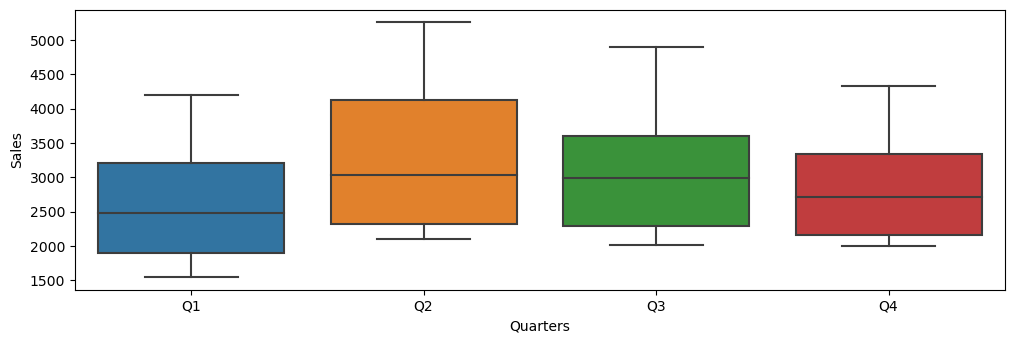

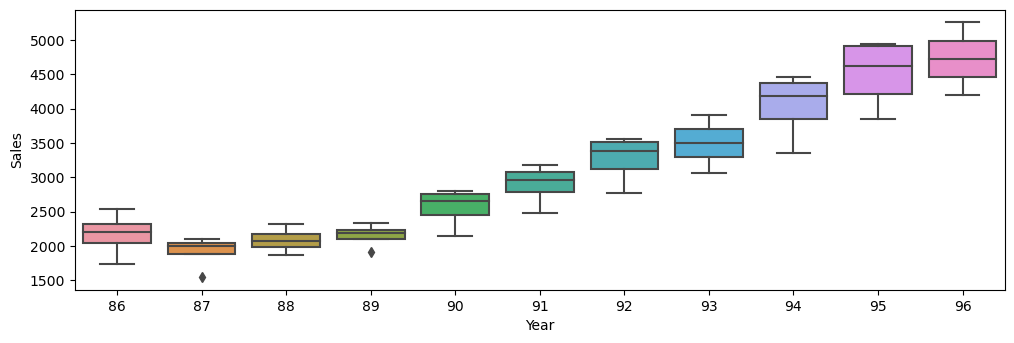

In [23]:
plt.figure(figsize=(12,8))
plt.subplot(211)
sns.boxplot(x="Quarters",y="Sales",data=cola)
plt.show()
plt.figure(figsize=(12,8))
plt.subplot(212)
sns.boxplot(x="Year",y="Sales",data=cola)
plt.show()

In [24]:
cola['t']=np.arange(1,43)
cola['t_squared']=cola['t']*cola['t']
cola['logsales']=np.log(cola['Sales'])
cola.head()

,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,logsales
0,1734.827000,Q1,86,1.0,0.0,0.0,0.0,1,1,7.458663
1,2244.960999,Q2,86,0.0,1.0,0.0,0.0,2,4,7.716443
2,2533.804993,Q3,86,0.0,0.0,1.0,0.0,3,9,7.837477
3,2154.962997,Q4,86,0.0,0.0,0.0,1.0,4,16,7.675529
4,1547.818996,Q1,87,1.0,0.0,0.0,0.0,5,25,7.344602


## Moving Average

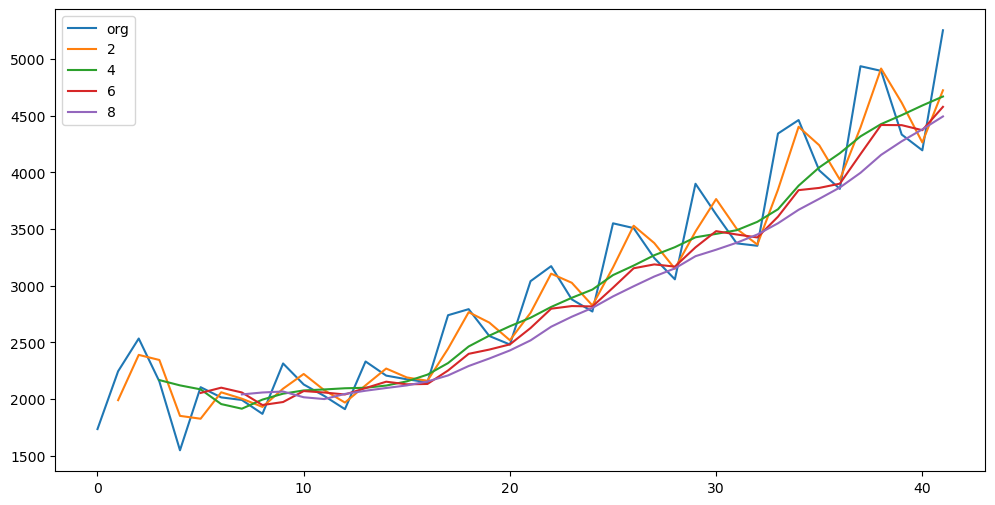

In [25]:
plt.figure(figsize=(12,6))
cola.Sales.plot(label='org')
for i in range(2,10,2):
    cola["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best');

## Decomposition Plot

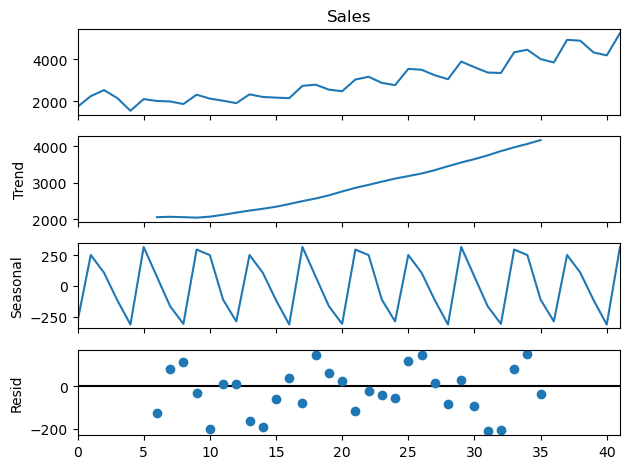

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(cola.Sales,period=12)
decompose_ts_add.plot()
plt.show()

## Testing for Stationary

In [27]:
### Testing For Stationarity
from statsmodels.tsa.stattools import adfuller

In [28]:
test_result=adfuller(cola['Sales'])

In [29]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Sales):
    result=adfuller(Sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [30]:
adfuller_test(cola['Sales'])

ADF Test Statistic : 1.3094210153268104
p-value : 0.9966611673930905
#Lags Used : 7
Number of Observations Used : 34
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [31]:
train = cola.head(32)
test = cola.tail(10)

In [32]:
#Linear Model
import statsmodels.formula.api as smf
linear_model = smf.ols('Sales~t', data=train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_linear))**2))
rmse_linear

752.9233932767115

In [33]:
#Exponential Model
Exp = smf.ols('logsales~t', data=train).fit()
pred_exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_exp = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_exp)))**2))
rmse_exp


590.3316432076576

In [34]:
#Quadratic 

Quad = smf.ols('Sales~t+t_squared',data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

457.73573554072897

In [35]:
#Additive seasonality 

add_sea = smf.ols('Sales~Q1+Q2+Q3',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Q1','Q2','Q3']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea


1850.4665461858353

In [36]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test[['Q1','Q2','Q3','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad


277.3510771128774

In [38]:
#Multiplicative Seasonality

Mul_sea = smf.ols('logsales~Q1+Q2+Q3',data = train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea


1908.250394836116

In [40]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('logsales~t+Q1+Q2+Q3',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

448.867818269187

In [41]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_exp","rmse_quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,277.351077
6,rmse_Mult_add_sea,448.867818
2,rmse_quad,457.735736
1,rmse_exp,590.331643
0,rmse_linear,752.923393
3,rmse_add_sea,1850.466546
5,rmse_Mult_sea,1908.250395
